<a href="https://colab.research.google.com/github/MOHAMMADIKRAM03/Artificial-Neural-Networks-Lab./blob/main/EXP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=0b4d47d632207a2b276b729f2f0daf7a0c03ace3cce2d782d3fdc20b6c9f179e
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


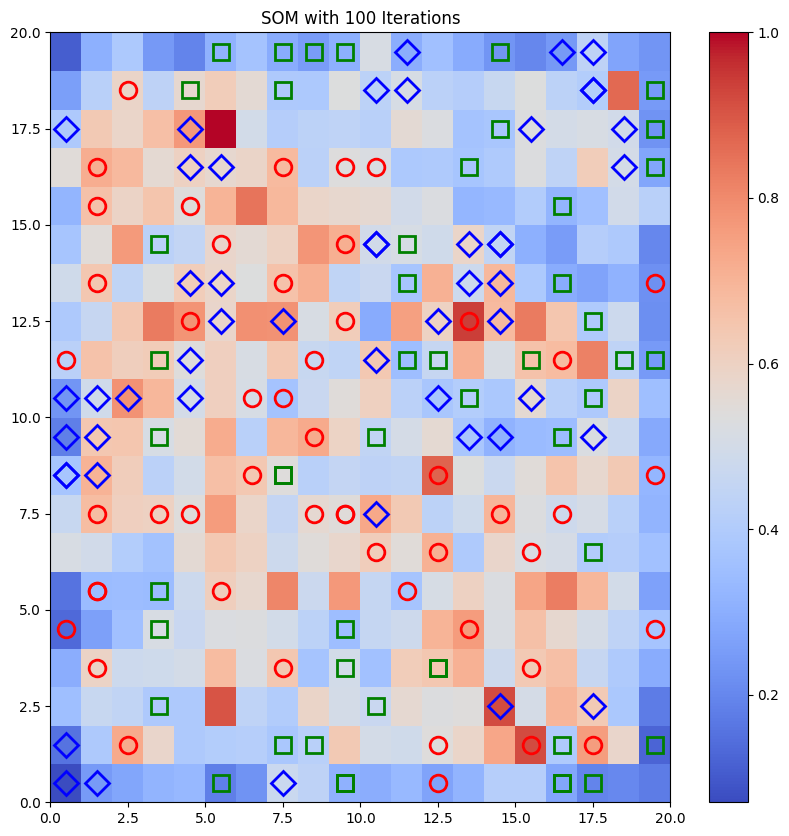

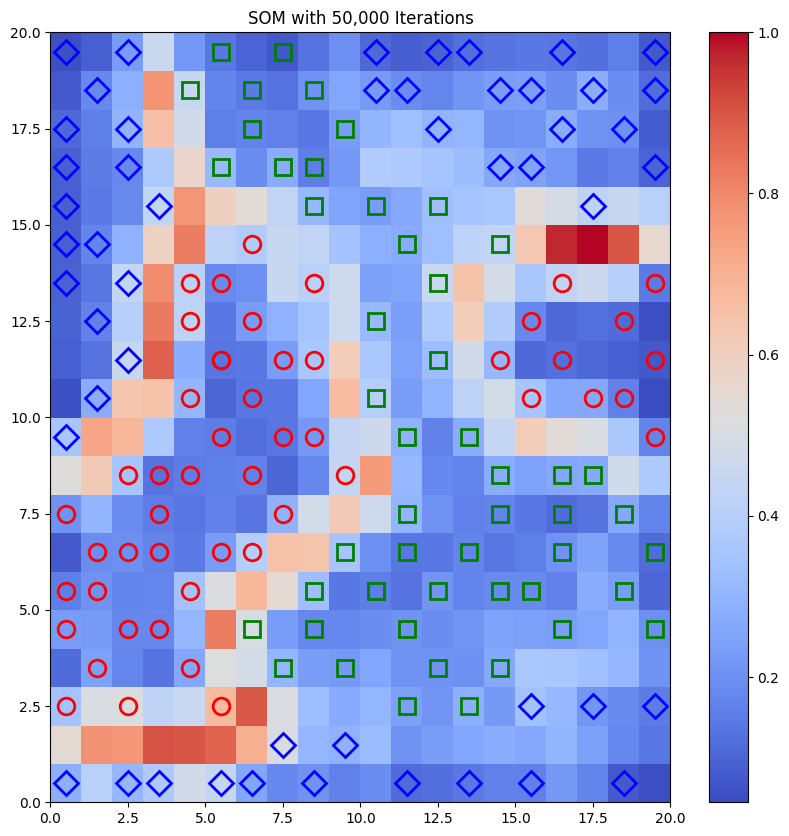

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the Iris dataset
data = pd.read_csv('Iris.csv')  # Adjust file path if needed

# Preprocess the dataset
X = data.drop(['Species'], axis=1).values
y = data['Species'].values

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the class labels
le = LabelEncoder()
y = le.fit_transform(y)

# Unique classes
class_names = np.unique(y)

# Initialize SOM with a 20x20 lattice and input size matching the dataset
som = MiniSom(x=20, y=20, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize weights randomly
som.random_weights_init(X)

# Train the SOM with 100 iterations
som.train_random(data=X, num_iteration=100)

# Plot the SOM with colorbar and winner neurons for 100 iterations
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot distance map as background
plt.colorbar()  # Color bar for visualizing distances

# Overlay the plot with the weights of the winning neurons
markers = ['o', 's', 'D']  # circle, square, diamond
colors = ['r', 'g', 'b']  # red, green, blue for different classes

for i, x in enumerate(X):
    winner = som.winner(x)  # Get the winning neuron for the input data point
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, markers[y[i]], markerfacecolor='None',
             markeredgecolor=colors[y[i]], markersize=12, markeredgewidth=2)

plt.title("SOM with 100 Iterations")
plt.show()

# Retrain the SOM with 50,000 iterations
som.train_random(data=X, num_iteration=50000)

# Plot the SOM with colorbar and winner neurons after 50,000 iterations
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot distance map as background
plt.colorbar()  # Color bar for visualizing distances

# Overlay the plot with the weights of the winning neurons
for i, x in enumerate(X):
    winner = som.winner(x)  # Get the winning neuron for the input data point
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, markers[y[i]], markerfacecolor='None',
             markeredgecolor=colors[y[i]], markersize=12, markeredgewidth=2)

plt.title("SOM with 50,000 Iterations")
plt.show()
